Repo: [Github](https://github.com/shadee22/Notebooks)
Author: [Shadeer](https://www.linkedin.com/in/shadeer-/)

Thanks-to: [O'Really](https://www.oreilly.com/products/books-videos.html)

# 🚀 Noise Removal for Digit Images
## 🎯 Problem Statement
The objective of this notebook is to address the  noise in digit images and Create a model for noise removal:

 Our challenge is to:
    
- 🔍 Detect and analyze the handwritten digits from the MNIST dataset.
- 🛠 Remove any noise that might be present in these images.
- 🤖 Train a model that can recognize these digits with high accuracy after noise removal.

## 📊 Dataset

We'll be using the Famouse MNIST dataset:

- Contains 70,000 images of handwritten digits.
- Each image is 28x28 pixels, representing digits 0 through 9.
- 
## 🧠 Approach
- **Data Loading:** Fetch the MNIST dataset and understand its structure.
- **Visualization:** See the handwritten digits in their raw form.
- **Preprocessing:** Prepare the dataset for training and testing.
- **Model Building:** Use the K-Nearest Neighbors (KNN) classifier for digit recognition.
Evaluation: Gauge the model's performance and accuracy.

# 🌟 Goal
Achieve a high recognition accuracy and provide a clear visualization of the handwritten digits, free from noise.



In [57]:
# Start fetching a do the Noise Cancellation process
from sklearn.datasets import fetch_openml
import matplotlib as mpl
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
mnist = fetch_openml('mnist_784', version=1, parser="auto")


In [11]:
print(mnist.keys())
print("Shape of single digit:",np.array(mnist.data)[0].shape)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Shape of single digit: (784,)


# Visualize function for digits

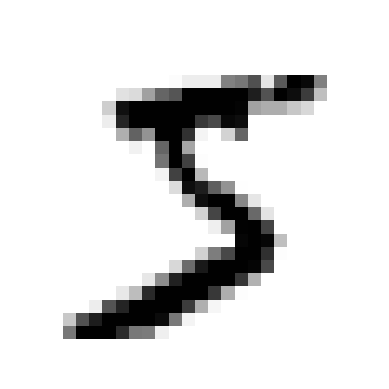

In [19]:
def plot_digit(digit_pixels):
    """
    Plot a single digit given its pixel data.
    
    Args:
        digit_pixels (array-like): 784 pixel data of a single digit.

    Example:
        digit_data = np.array(mnist.data)[0]
        plot_digit(digit_data)

    """
    reshaped = digit_pixels.reshape(28,28)
    plt.imshow(reshaped, cmap=plt.cm.binary, interpolation="nearest")
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

digit_data = np.array(mnist.data)[0]
plot_digit(digit_data)


# Prepocessing Data

In [22]:
# Split X and y
X = mnist.data
y = mnist.target

# Train test split for training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the shapes of the output arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


In [29]:
# Add Gaussion noise to the image for X_train 
def add_noise(images, noise_factor=0.5):
    noisy_image =  images + noise_factor * np.random.normal(0 , 20 , size=np.array(images.shape))
    return noisy_image

In [31]:
X_train_n = add_noise(X_train)

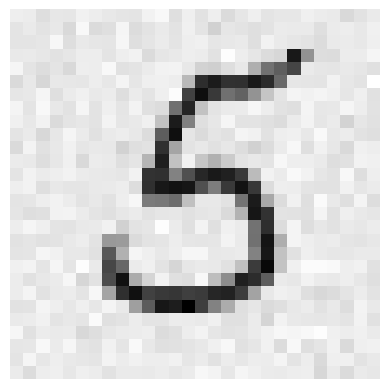

In [38]:
digit_after_noise = np.array(X_train_n)[0]
plot_digit(digit_after_noise)

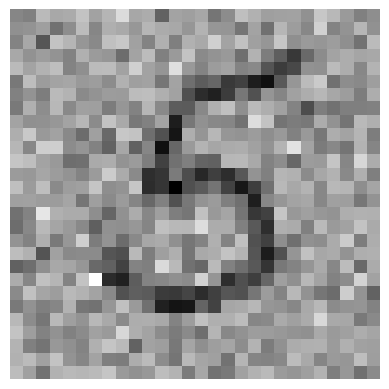

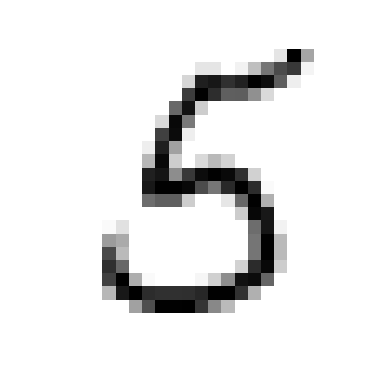

In [45]:
# adding more noise for it 
X_train_n = add_noise(X_train,3)
X_test_n = add_noise(X_test,3)
plot_digit(np.array(X_train_n)[0])
plot_digit(np.array(X_train)[0])

In [46]:
# Create new X_train and y_train
X_train_noise = X_train_n.copy()
y_train = X_train
X_test_noise = X_test_n.copy()
y_test = X_test

# Train the model

In [47]:
# Create model and fit it 
model = KNeighborsClassifier()
model.fit(X_train_noise, y_train)

KNeighborsClassifier()

# Get Prediction from trained Knn model

In [56]:
# Predict on our test for evaluation
y_preds = model.predict(np.array(X_test_noise))

/usr/local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Output of our model

Model output on removing noise of digits


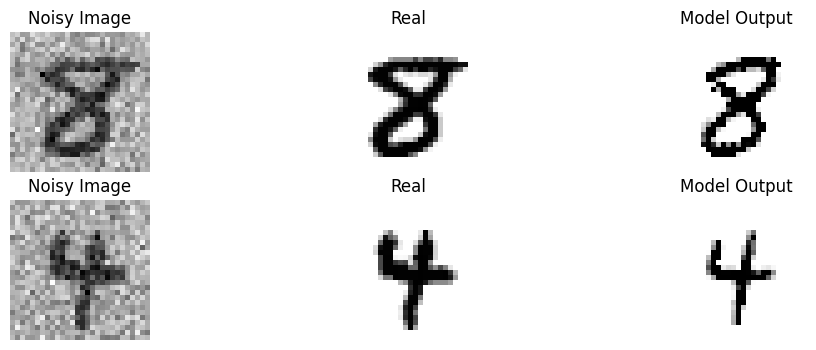

In [104]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))

titles = ['Noisy Image', 'Real', 'Model Output']

for i in range(2):
    data_sets = [np.array(X_test_noise), np.array(y_test), np.array(y_preds)]
    for j, dataset in enumerate(data_sets):
        axes[i, j].imshow(dataset[i].reshape(28, 28), cmap=plt.cm.binary, interpolation="nearest")
        axes[i, j].set_title(titles[j])
        axes[i, j].axis('off')

print("Model output on removing noise of digits")
plt.show()


In [ ]:
plot_digit(y_preds[0])